In [17]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets

rcParams['figure.figsize'] = 8,4

In [ ]:
# 原範例使用
"""
df = pd.read_csv(
    filepath_or_buffer='../../data/iris.data.csv',
    header=None,
    sep=',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
X = df.ix[:,0:4].values
y = df.ix[:,4].values
"""

In [18]:
# Factor analysis on iris dataset
iris =  datasets.load_iris()

In [6]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [29]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()
# sklearn 的 iris taget是整理過的 , target 0.0 -> setosa
# 1.0 -> versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


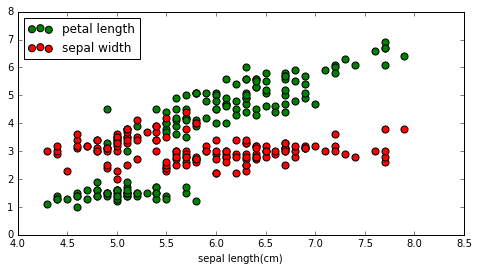

In [47]:
# df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', c=['darkgray'], s=50)
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=['green'], s=50)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=['red'], s=50)
# plt.ylabel('sepal width')
plt.legend(['petal length','sepal width'],loc="upper left")
plt.xlabel('sepal length(cm)')
plt.show()

[]

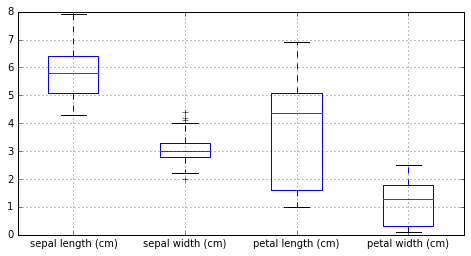

In [25]:
df_notarget = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'] )
df_notarget[:5]
df_notarget.boxplot(return_type='dict')
plt.plot()
# 可以看到 Sepal width >4 跟 <2.5的

In [27]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0.0
32,5.2,4.1,1.5,0.1,0.0
33,5.5,4.2,1.4,0.2,0.0


In [30]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1.0


In [31]:
#Applying Tukey outlier labeling
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
print X_df.describe()

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5
